## Creating plots of percentage of non-bot clients present in the network by specific times + running KS tests on distributions of non-bot client duration and arrival times to the network

## NOTE: These data are in a fixed location and are not moved to work with the PUI environment variable. 
Cells referencing the visualization of data that reveal client device locations, addresses, or any potentially identifying information have been removed or cleared.

In [177]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../loMaWa/')

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import scipy
from scipy import stats

from collections import Counter
from scipy.stats import ks_2samp

import utils as u
import plotting as p

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load in bot-filtered data with first and last seen times and durations

In [3]:
inFile = '/home/cusp/ekh331/wifi/WiFi/fs_ls.csv'
cols = ['client_mac','first_seen','last_seen','timeDelta', 'dayofyear', 'fs_hour','fs_min','ls_hour','ls_min']
df = u.read_wifi(inFile, cols, parse_dates=False)

Read /home/cusp/ekh331/wifi/WiFi/fs_ls.csv with shape: (33690286, 9)


In [9]:
# Look at counts for each day of the week

for day_num in range(7):
    df_subset = df[df['dayofyear'] % 7 == day_num]
    print df_subset.shape

(3559325, 9)
(3155029, 9)
(5106897, 9)
(5419563, 9)
(5496788, 9)
(5563392, 9)
(5389292, 9)


## Individual days' percent network first seen plots

Big shape:  (3559325, 9)
Small shape:  (35593, 9)
Computed first_seen_hms
Got here!
Big shape:  (3155029, 9)
Small shape:  (31550, 9)
Computed first_seen_hms
Got here!
Big shape:  (5106897, 9)
Small shape:  (51068, 9)
Computed first_seen_hms
Got here!
Big shape:  (5419563, 9)
Small shape:  (54195, 9)
Computed first_seen_hms
Got here!
Big shape:  (5496788, 9)
Small shape:  (54967, 9)
Computed first_seen_hms
Got here!
Big shape:  (5563392, 9)
Small shape:  (55633, 9)
Computed first_seen_hms
Got here!
Big shape:  (5389292, 9)
Small shape:  (53892, 9)
Computed first_seen_hms
Got here!


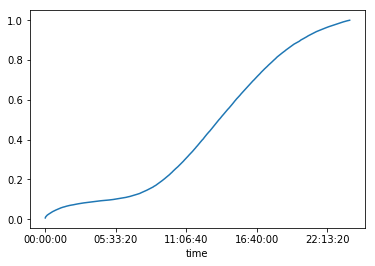

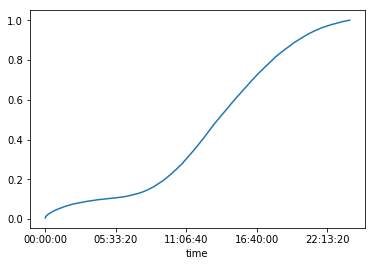

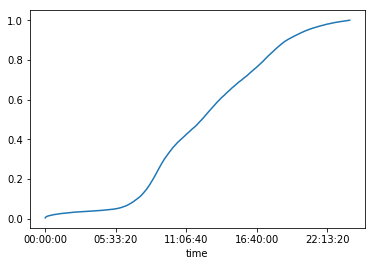

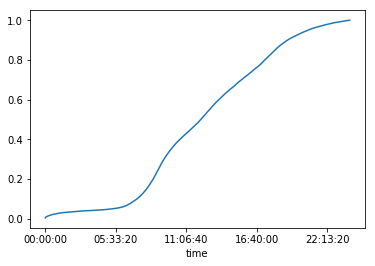

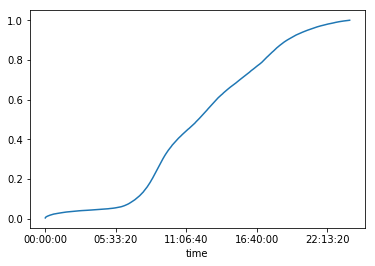

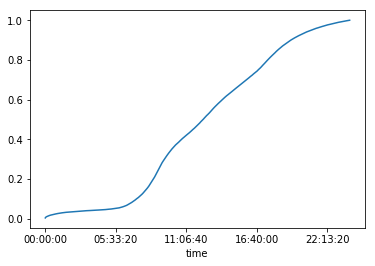

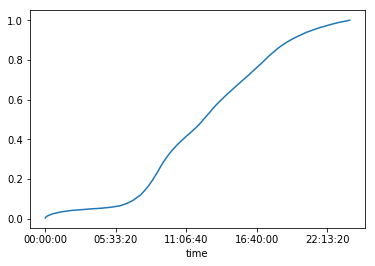

In [43]:
random.seed(0)

results_dict = {} # (day_num, hour, min) -> percentage seen by that time on that day

for day_num in range(7):
    df_subset = df[df['dayofyear'] % 7 == day_num]
    print "Big shape: ", df_subset.shape
    df_subset = df_subset.sample(n=df_subset.shape[0]/100)
    print "Small shape: ", df_subset.shape

    first_seen_hms = [(row['fs_hour'], row['fs_min']) for _, row in df_subset.iterrows()]
    
    print "Computed first_seen_hms"
    
    first_seen_counts = Counter(first_seen_hms)
    
    times = []     # x-axis for our plot
    le_counts = [] # y-axis for our plot 
    le_count = 0
    
    print "Got here!"
    
    for h in range(24):
        for m in range(60):
            times.append(dt.time(hour=h, minute=m))
            le_count += first_seen_counts[(h, m)]
            le_counts.append(le_count)
            
            
            
    for i, val in enumerate(le_counts):
        le_counts[i] = (val + 0.) / le_counts[-1]
        t = times[i]
        results_dict[(day_num, t.hour, t.minute)] = le_counts[i]
            
    plt.figure()
    plt.plot(times, le_counts)
    
plt.show()    

## Last Seen Plot

Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!


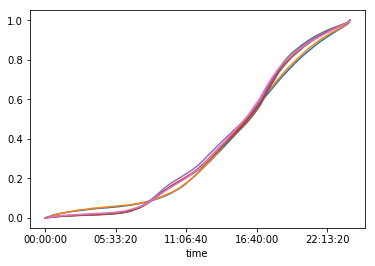

In [54]:
for day_num in range(7):
    df_subset = df[df['dayofyear'] % 7 == day_num]
    #print "Big shape: ", df_subset.shape
    df_subset = df_subset.sample(n=df_subset.shape[0]/100)
    #print "Small shape: ", df_subset.shape

    last_seen_hms = [(row['ls_hour'], row['ls_min']) for _, row in df_subset.iterrows()]
    
    print "Computed last_seen_hms"
    
    last_seen_counts = Counter(last_seen_hms)
    
    times_ls = []     # x-axis for our plot
    le_counts_ls = [] # y-axis for our plot 
    le_count_ls = 0
    
    print "Got here!"
    
    for h in range(24):
        for m in range(60):
            times_ls.append(dt.time(hour=h, minute=m))
            le_count_ls += last_seen_counts[(h, m)]
            le_counts_ls.append(le_count_ls)
            
    for i, val in enumerate(le_counts_ls):
        le_counts_ls[i] = (val + 0.) / le_counts_ls[-1]
            
    plt.plot(times_ls, le_counts_ls)

Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


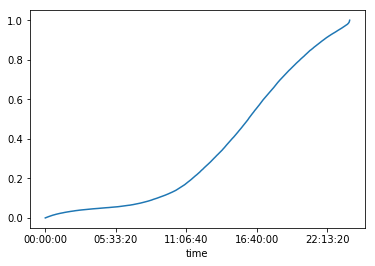

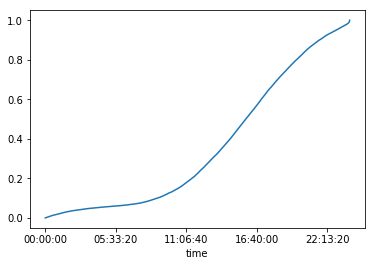

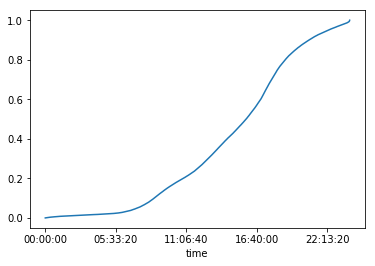

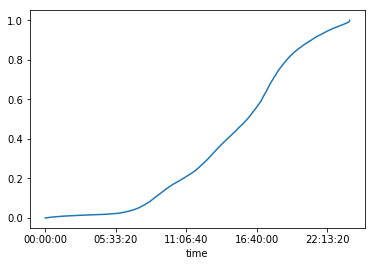

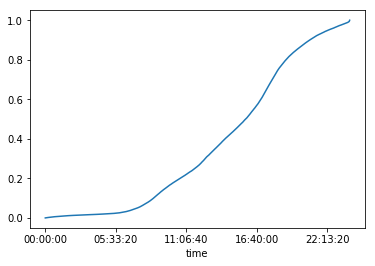

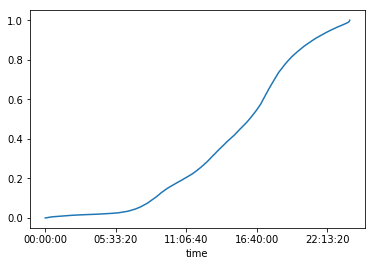

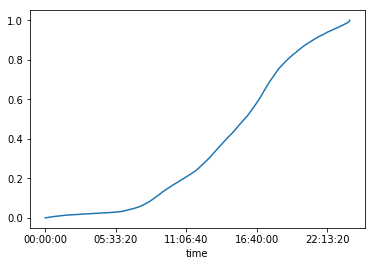

In [52]:
random.seed(0)

results_dict_ls = {} # (day_num, hour, min) -> percentage seen by that time on that day

for day_num in range(7):
    df_subset = df[df['dayofyear'] % 7 == day_num]
    #print "Big shape: ", df_subset.shape
    df_subset = df_subset.sample(n=df_subset.shape[0]/100)
    #print "Small shape: ", df_subset.shape

    last_seen_hms = [(row['ls_hour'], row['ls_min']) for _, row in df_subset.iterrows()]
    
    print "Computed last_seen_hms"
    
    last_seen_counts = Counter(last_seen_hms)
    
    times_ls = []     # x-axis for our plot
    le_counts_ls = [] # y-axis for our plot 
    le_count_ls = 0
    
    print "Got here!"
    
    for h in range(24):
        for m in range(60):
            times_ls.append(dt.time(hour=h, minute=m))
            le_count_ls += last_seen_counts[(h, m)]
            le_counts_ls.append(le_count_ls)
            
            
            
    for i, val in enumerate(le_counts_ls):
        le_counts_ls[i] = (val + 0.) / le_counts_ls[-1]
        t = times_ls[i]
        results_dict_ls[(day_num, t.hour, t.minute)] = le_counts_ls[i]
            
    plt.figure()
    plt.plot(times_ls, le_counts_ls)
    
plt.legend()
plt.show() 

## Query function to pull percentage values from the plots

In [44]:
def query(day_num, h, m):
    return results_dict[(day_num, h, m)]

In [45]:
query(0, 10, 30)

0.2674121315989099

In [46]:
query(2, 9, 15)

0.286872405420224

## Combo plot

Big shape:  (3559325, 9)
Small shape:  (35593, 9)
Computed first_seen_hms
Got here!
Big shape:  (3155029, 9)
Small shape:  (31550, 9)
Computed first_seen_hms
Got here!
Big shape:  (5106897, 9)
Small shape:  (51068, 9)
Computed first_seen_hms
Got here!
Big shape:  (5419563, 9)
Small shape:  (54195, 9)
Computed first_seen_hms
Got here!
Big shape:  (5496788, 9)
Small shape:  (54967, 9)
Computed first_seen_hms
Got here!
Big shape:  (5563392, 9)
Small shape:  (55633, 9)
Computed first_seen_hms
Got here!
Big shape:  (5389292, 9)
Small shape:  (53892, 9)
Computed first_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!
Computed last_seen_hms
Got here!


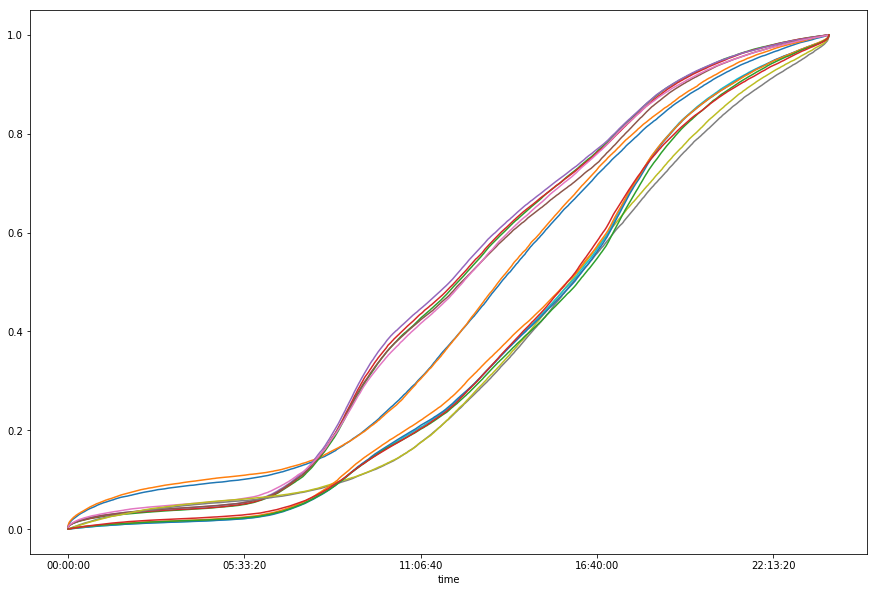

In [61]:
random.seed(0)

plt.figure(figsize=(15,10))

for day_num in range(7):
    df_subset = df[df['dayofyear'] % 7 == day_num]
    print "Big shape: ", df_subset.shape
    df_subset = df_subset.sample(n=df_subset.shape[0]/100)
    print "Small shape: ", df_subset.shape

    first_seen_hms = [(row['fs_hour'], row['fs_min']) for _, row in df_subset.iterrows()]
    
    print "Computed first_seen_hms"
    
    first_seen_counts = Counter(first_seen_hms)
    
    times = []     # x-axis for our plot
    le_counts = [] # y-axis for our plot 
    le_count = 0
    
    print "Got here!"
    
    for h in range(24):
        for m in range(60):
            times.append(dt.time(hour=h, minute=m))
            le_count += first_seen_counts[(h, m)]
            le_counts.append(le_count)
            
    for i, val in enumerate(le_counts):
        le_counts[i] = (val + 0.) / le_counts[-1]
            
    plt.plot(times, le_counts)
    
for day_num in range(7):
    df_subset = df[df['dayofyear'] % 7 == day_num]
    #print "Big shape: ", df_subset.shape
    df_subset = df_subset.sample(n=df_subset.shape[0]/100)
    #print "Small shape: ", df_subset.shape

    last_seen_hms = [(row['ls_hour'], row['ls_min']) for _, row in df_subset.iterrows()]
    
    print "Computed last_seen_hms"
    
    last_seen_counts = Counter(last_seen_hms)
    
    times_ls = []     # x-axis for our plot
    le_counts_ls = [] # y-axis for our plot 
    le_count_ls = 0
    
    print "Got here!"
    
    for h in range(24):
        for m in range(60):
            times_ls.append(dt.time(hour=h, minute=m))
            le_count_ls += last_seen_counts[(h, m)]
            le_counts_ls.append(le_count_ls)
            
    for i, val in enumerate(le_counts_ls):
        le_counts_ls[i] = (val + 0.) / le_counts_ls[-1]
            
    plt.plot(times_ls, le_counts_ls)
    

## Weekend plot of first and last seens

Computed first_seen_hms
Computed first_seen_hms
Computed last_seen_hms
Computed last_seen_hms


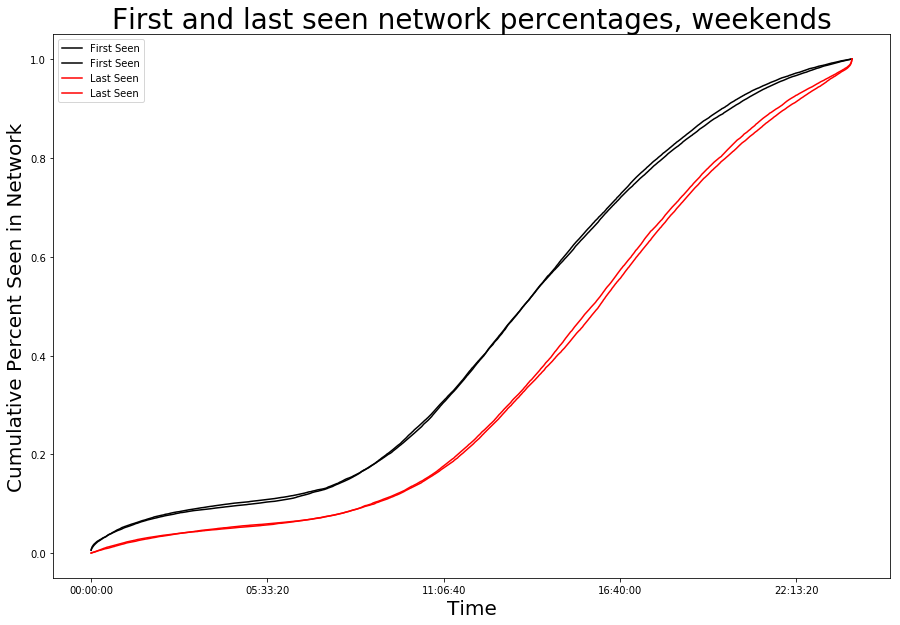

In [73]:
random.seed(0)
plt.figure(figsize=(15,10))
for day_num in range(2):
    df_subset = df[df['dayofyear'] % 7 == day_num]
    #print "Big shape: ", df_subset.shape
    df_subset = df_subset.sample(n=df_subset.shape[0]/100)
    #print "Small shape: ", df_subset.shape

    first_seen_hms = [(row['fs_hour'], row['fs_min']) for _, row in df_subset.iterrows()]
    
    print "Computed first_seen_hms"
    
    first_seen_counts = Counter(first_seen_hms)
    
    times = []     # x-axis for our plot
    le_counts = [] # y-axis for our plot 
    le_count = 0
    
    #print "Got here!"
    
    for h in range(24):
        for m in range(60):
            times.append(dt.time(hour=h, minute=m))
            le_count += first_seen_counts[(h, m)]
            le_counts.append(le_count)
            
    for i, val in enumerate(le_counts):
        le_counts[i] = (val + 0.) / le_counts[-1]
            
    plt.plot(times, le_counts, c='k', label='First Seen')
    
for day_num in range(2):
    df_subset = df[df['dayofyear'] % 7 == day_num]
    #print "Big shape: ", df_subset.shape
    df_subset = df_subset.sample(n=df_subset.shape[0]/100)
    #print "Small shape: ", df_subset.shape

    last_seen_hms = [(row['ls_hour'], row['ls_min']) for _, row in df_subset.iterrows()]
    
    print "Computed last_seen_hms"
    
    last_seen_counts = Counter(last_seen_hms)
    
    times_ls = []     # x-axis for our plot
    le_counts_ls = [] # y-axis for our plot 
    le_count_ls = 0
    
    #print "Got here!"
    
    for h in range(24):
        for m in range(60):
            times_ls.append(dt.time(hour=h, minute=m))
            le_count_ls += last_seen_counts[(h, m)]
            le_counts_ls.append(le_count_ls)
            
    for i, val in enumerate(le_counts_ls):
        le_counts_ls[i] = (val + 0.) / le_counts_ls[-1]
            
    plt.plot(times_ls, le_counts_ls, c='r', label='Last Seen')
    plt.title('First and last seen network percentages, weekends', size=28)
    plt.xlabel('Time', size=20)
    plt.ylabel('Cumulative Percent Seen in Network', size=20)
    plt.legend(loc='upper left')
    plt.savefig('weekend_fsls_wleg.png')

## Weekday plot of first and last seens

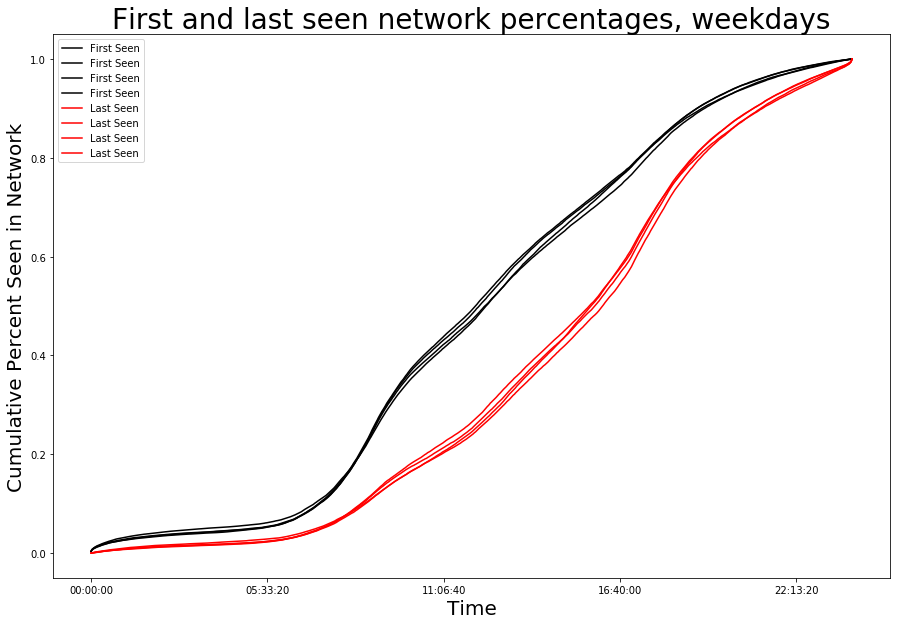

In [76]:
random.seed(0)
plt.figure(figsize=(15,10))
for day_num in range(3,7):
    df_subset = df[df['dayofyear'] % 7 == day_num]
    #print "Big shape: ", df_subset.shape
    df_subset = df_subset.sample(n=df_subset.shape[0]/100)
    #print "Small shape: ", df_subset.shape

    first_seen_hms = [(row['fs_hour'], row['fs_min']) for _, row in df_subset.iterrows()]
    
    #print "Computed first_seen_hms"
    
    first_seen_counts = Counter(first_seen_hms)
    
    times = []     # x-axis for our plot
    le_counts = [] # y-axis for our plot 
    le_count = 0
    
    #print "Got here!"
    
    for h in range(24):
        for m in range(60):
            times.append(dt.time(hour=h, minute=m))
            le_count += first_seen_counts[(h, m)]
            le_counts.append(le_count)
            
    for i, val in enumerate(le_counts):
        le_counts[i] = (val + 0.) / le_counts[-1]
            
    plt.plot(times, le_counts, c='k', label='First Seen')
    
for day_num in range(3,7):
    df_subset = df[df['dayofyear'] % 7 == day_num]
    #print "Big shape: ", df_subset.shape
    df_subset = df_subset.sample(n=df_subset.shape[0]/100)
    #print "Small shape: ", df_subset.shape

    last_seen_hms = [(row['ls_hour'], row['ls_min']) for _, row in df_subset.iterrows()]
    
    #print "Computed last_seen_hms"
    
    last_seen_counts = Counter(last_seen_hms)
    
    times_ls = []     # x-axis for our plot
    le_counts_ls = [] # y-axis for our plot 
    le_count_ls = 0
    
   # print "Got here!"
    
    for h in range(24):
        for m in range(60):
            times_ls.append(dt.time(hour=h, minute=m))
            le_count_ls += last_seen_counts[(h, m)]
            le_counts_ls.append(le_count_ls)
            
    for i, val in enumerate(le_counts_ls):
        le_counts_ls[i] = (val + 0.) / le_counts_ls[-1]
            
    plt.plot(times_ls, le_counts_ls, c='r', label='Last Seen')
    plt.title('First and last seen network percentages, weekdays', size=28)
    plt.xlabel('Time', size=20)
    plt.ylabel('Cumulative Percent Seen in Network', size=20)
    plt.legend(loc='upper left')
    plt.savefig('fslsweekday_wleg.png')

## Separate data for first seen times in the network as well as duration in the network for specific days of the week

In [173]:
monday = df[df['dayofyear'] % 7 == 2]
friday = df[df['dayofyear'] % 7 == 6]

monday_reduced = monday.sample(n=monday.shape[0]/10)
friday_reduced = monday.sample(n=friday.shape[0]/10)


In [181]:
wednesday = df[df['dayofyear'] % 7 == 4]
saturday = df[df['dayofyear'] % 7 == 0]

wednesday_reduced = wednesday.sample(n=wednesday.shape[0]/10)
saturday_reduced = saturday.sample(n=saturday.shape[0]/10)

In [185]:
def extract_fs_times(df_arg):
    fs_times = []
    for index, row in df_arg.iterrows():
       h, m = row['fs_hour'], row['fs_min']
       fs_times.append((h + m/60.)/24.)

    return fs_times
        
monday_fs_times = extract_fs_times(monday_reduced)
friday_fs_times = extract_fs_times(friday_reduced)
    

In [189]:
wednesday_fs_times = extract_fs_times(wednesday_reduced)
saturday_fs_times = extract_fs_times(saturday_reduced)

In [193]:
def extract_duration(df_arg):
    durations = []
    for index, row in df_arg.iterrows():
       duration = row['timeDelta']
       durations.append(duration)

    return durations

In [194]:
monday_durations = extract_duration(monday_reduced)
friday_durations = extract_duration(friday_reduced)

In [190]:
wednesday_durations = extract_duration(wednesday_reduced)
saturday_durations = extract_duration(saturday_reduced)

## Two-Sample KS test for first seen distributions. Alpha = 0.05

In [178]:
#Monday vs Friday
ks_2samp(monday_fs_times, friday_fs_times)

Ks_2sampResult(statistic=0.0013287316598248303, pvalue=0.74330296350344327)

In [191]:
#Wendesday vs Saturday
ks_2samp(wednesday_fs_times, saturday_fs_times)

Ks_2sampResult(statistic=0.14093304131889367, pvalue=0.0)

## Two-Sample KS test for duration in network. Alpha = 0.05

In [187]:
#Monday vs Friday
ks_2samp(monday_durations, friday_durations)

Ks_2sampResult(statistic=0.022087780413912385, pvalue=1.3589335991778846e-111)

In [192]:
#Wednesday vs Saturday
ks_2samp(wednesday_durations, saturday_durations)

Ks_2sampResult(statistic=0.15428935303676863, pvalue=0.0)